In [2]:
import numpy as np
import csv
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [6]:
train_file = 'data/train.csv'
test_file  = 'data/test.csv'
soln_file  = 'data/user_median.csv'

In [323]:
df = pd.read_csv(train_file, header=0)
testdf = pd.read_csv(test_file, header=0)

In [8]:
df.head()

,user,artist,plays
0,eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03,5a8e07d5-d932-4484-a7f7-e700793a9c94,554
1,44ce793a6cd9d20f13f4a576a818ef983314bb5d,a3a92047-be1c-4f3e-8960-c4f8570984df,81
2,da9cf3f557161d54b76f24db64be9cc76db008e3,eeb1195b-f213-4ce1-b28c-8565211f8e43,708
3,8fa49ab25d425edcf05d44bfc1d5aea895287d81,a1419808-65d3-4d40-998c-1a0bac65eabc,265
4,b85fcaef67d2669cd99b334b5e8c8705263db2cf,a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432,220


In [324]:
testdf.head()

,Id,user,artist
0,1,306e19cce2522fa2d39ff5dfc870992100ec22d2,4ac4e32b-bd18-402e-adad-ae00e72f8d85
1,2,9450d351278df4938bdea4ed86aec940a4e927ac,1f574ab1-a46d-4586-9331-f0ded23e0411
2,3,801909d6955f59033c88595d3d7f8a6a5dcd53cc,3eb72791-6322-466b-87d3-24d74901eb2d
3,4,e3ed47445c127fbeff47fb58f6bbf2f3b4535d82,61604b45-8a91-4e33-a1b6-45d7b1fec4e5
4,5,a73f46652103f3a5f7429159310f6928f79644aa,5dfdca28-9ddc-4853-933c-8bc97d87beec


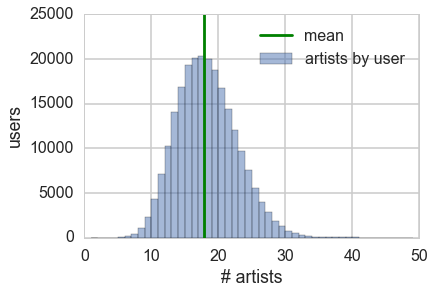

In [130]:
#your code here
artists_user = df.groupby('user')['artist'].count()
plt.hist(artists_user, alpha=0.5, bins=np.arange(1,50,1), label="artists by user");
plt.xlabel('# artists')
plt.ylabel('users')
plt.axvline(np.mean(artists_user), color='green',label='mean')
#plt.xticks(np.arange(0,90,5))
plt.legend()

In [10]:
np.mean(df.groupby('user')['artist'].count())

17.809915725761513

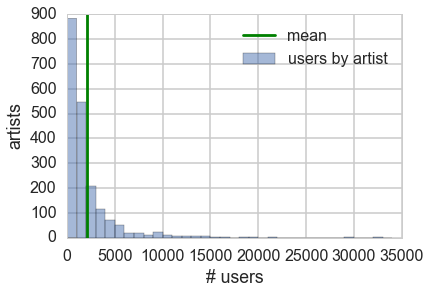

In [129]:
#your code here
users_artist = df.groupby('artist')['user'].count()
plt.hist(users_artist, alpha=0.5, bins=np.arange(1,35000,1000), label="users by artist");
plt.xlabel('# users')
plt.ylabel('artists')
plt.axvline(np.mean(users_artist), color='green',label='mean')
plt.legend()

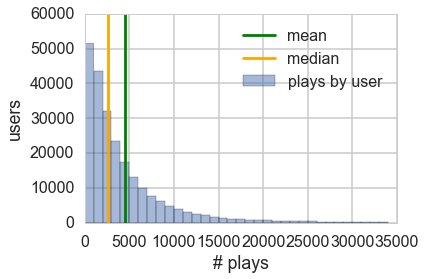

In [133]:
#your code here
plays_user = df.groupby('user')['plays'].sum()
plt.hist(plays_user, alpha=0.5, bins=np.arange(1,35000,1000), label="plays by user");
plt.xlabel('# plays')
plt.ylabel('users')
plt.axvline(np.mean(plays_user), color='green',label='mean')
plt.axvline(np.median(plays_user), color='orange',label='median')
plt.legend()
plt.tight_layout()
plt.savefig('plays_by_user')

In [12]:
np.mean(df.groupby('artist')['user'].count())

2077.402

In [14]:
trainlist=[]
validatelist=[]
i = 0
for k, v in df.groupby('user'):
    validatelist.append(v[-len(v)/8:]) 
    trainlist.append(v[:-len(v)/8])
traindf=pd.concat(trainlist)
validatedf=pd.concat(validatelist)
print traindf.shape, validatedf.shape

In [9]:
pd.DataFrame.to_csv(traindf, 'data/traindf2')
pd.DataFrame.to_csv(validatedf, 'data/validatedf2')

In [3]:
traindf = pd.DataFrame.from_csv('data/traindf2')
validatedf = pd.DataFrame.from_csv('data/validatedf2')

In [16]:
traindf.head()

,user,artist,plays
158901,00000c289a1829a808ac09c00daf10bc3c4e223b,c995a379-60b9-404b-bd97-a7e2de0751d3,198
326827,00000c289a1829a808ac09c00daf10bc3c4e223b,b071f9fa-14b0-4217-8e97-eb41da73f598,150
752135,00000c289a1829a808ac09c00daf10bc3c4e223b,7b885d42-3c41-4f43-9944-a5855ec5155e,361
827437,00000c289a1829a808ac09c00daf10bc3c4e223b,9fdaa16b-a6c4-4831-b87c-bc9ca8ce7eaa,168
978405,00000c289a1829a808ac09c00daf10bc3c4e223b,fb01635c-51fc-4cad-b71f-62e18bb3433b,231


In [52]:
ybar = traindf.plays.mean()
ybar

253.34438510117764

In [147]:
global_median = traindf.plays.median()
global_median

118.0

In [328]:
uuids = df.user.unique()#unique-users
uiids = df.artist.unique()#unique-items
uuidmap={v:k for k,v in enumerate(uuids)}#of length U
uiidmap={v:k for k,v in enumerate(uiids)}#of length M

In [138]:
#your code here
groupby_user = traindf.groupby('user')
user_biases = dict()
user_means = dict()
user_medians = dict()
user_biases_median = dict()
for id in uuids:
    group = groupby_user.get_group(id)
    user_mean = group.plays.mean()
    user_biases[id] = user_mean - ybar
    user_means[id] = user_mean
    user_medians[id] = group.plays.median()
    user_biases_median[id] = group.plays.median() - global_median

In [139]:
groupby_item = traindf.groupby('artist')
item_biases = dict()
item_means = dict()
item_medians = dict()
item_biases_median = dict()
for id in uiids:
    group = groupby_item.get_group(id)
    item_mean = group.plays.mean()
    item_biases[id] = item_mean - ybar
    item_means[id]  = item_mean
    item_medians[id] = group.plays.median()
    item_biases_median[id] = group.plays.median() - global_median

In [134]:
predictions={}
user_biases_validate = validatedf['user'].apply(lambda x: user_biases[x])
item_biases_validate = validatedf['artist'].apply(lambda x: item_biases[x])
predictions['baseline'] = (ybar + user_biases_validate + item_biases_validate).values

In [140]:
user_biases_validate = validatedf['user'].apply(lambda x: user_biases_median[x])
item_biases_validate = validatedf['artist'].apply(lambda x: item_biases_median[x])
predictions['baseline_median'] = (global_median + user_biases_validate + item_biases_validate).values

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(validatedf.plays, predictions['baseline'])

179.19299382677909

In [144]:
user_biases_validate = validatedf['user'].apply(lambda x: user_biases_median[x])
item_biases_validate = validatedf['artist'].apply(lambda x: item_biases_median[x])
predictions['baseline_median'] = (global_median + user_biases_validate + item_biases_validate).values

In [145]:
mean_absolute_error(validatedf.plays, predictions['baseline_median'])

141.4708830275784

In [102]:
predictions['user_mean'] = validatedf['user'].apply(lambda x: user_means[x])
mean_absolute_error(validatedf.plays, predictions['user_mean'])

162.44725936000501

In [276]:
predictions['user_median'] = validatedf['user'].apply(lambda x: user_medians[x])
mean_absolute_error(validatedf.plays, predictions['user_median'])

136.57260746288145

In [56]:
predictions_train = {}

In [345]:
predictions['item_median'] = validatedf['artist'].apply(lambda x: item_medians[x])
predictions_train['user_median'] = traindf['user'].apply(lambda x: user_medians[x])
predictions_train['item_median'] = traindf['artist'].apply(lambda x: item_medians[x])

In [19]:
%%time
import scipy.sparse as sp
test = validatedf[:1000].values
n_features = uuids.size + uiids.size
plays = np.zeros(test.shape[0])
matrix = np.zeros(test.shape[0],dtype=object)
for i,row in enumerate(test):
    if i%10000 == 0: print i
    user = row[0]
    artist = row[1]
    user_index = uuidmap[user]
    item_index = uiidmap[artist] + uuids.size
    newrow = np.zeros(n_features)
    newrow[user_index] = 1
    newrow[item_index] = 1
    newrow = sp.coo_matrix(newrow)
    matrix[i] = newrow
    plays[i] = row[2]
matrix = sp.vstack(matrix)

0
CPU times: user 2.23 s, sys: 6.57 ms, total: 2.24 s
Wall time: 2.25 s


In [334]:
#your code here
def getmats (indf, test=False):
    plays = np.zeros(indf.shape[0])
    n_features = uuids.size + uiids.size
    matrix = np.zeros([indf.shape[0]], dtype=object)
    for i,row in enumerate(indf.values):
        if i%100000 == 0: print i
        if test:
            user = row[1]
            artist = row[2]
        else :
            user = row[0]
            artist = row[1]
        user_index = uuidmap[user]
        item_index = uiidmap[artist] + uuids.size
        newrow = np.zeros(n_features)
        newrow[user_index] = 1
        newrow[item_index] = 1
        newrow = sp.coo_matrix(newrow)
        matrix[i] = newrow
        if not test:
            plays[i] = row[2]
    matrix = sp.vstack(matrix)
    return matrix, plays

In [35]:
%%time
traindm, trainplays = getmats(traindf)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [22]:
%%time
validatedm, validateplays = getmats(validatedf) 

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [42]:
def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((  loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

In [46]:
import cPickle as pickle

with open('data/validatedm', 'wb') as f:
    pickle.dump(validatedm, f, pickle.HIGHEST_PROTOCOL)
with open('data/traindm', 'wb') as f:
    pickle.dump(traindm, f, pickle.HIGHEST_PROTOCOL)

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(traindm,trainplays)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [153]:
predictions_train['ridge'] = ridge.predict(traindm)
predictions['ridge'] = ridge.predict(validatedm)

In [178]:
#alpha=1
mean_absolute_error(validatedf.plays, predictions['ridge'])

165.63693793257207

In [38]:
ridge = Ridge(alpha=0.1)
ridge.fit(traindm,trainplays)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
#alpha=0.1
mean_absolute_error(validatedf.plays, ridge.predict(validatedm))

167.48475043641207

In [40]:
ridge = Ridge(alpha=10)
ridge.fit(traindm,trainplays)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
#alpha=10
mean_absolute_error(validatedf.plays, ridge.predict(validatedm))

171.54505788453324

In [340]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(trainplays)
trainplays_stand = rs.transform(trainplays)

In [341]:
ridge_stand = Ridge(fit_intercept=False, alpha=1)
ridge_stand.fit(traindm, trainplays_stand)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [342]:
rs.scale_

216.0

In [271]:
mean_absolute_error(validatedf.plays, rs.inverse_transform(ridge_stand.predict(validatedm)))

165.5836282780202

In [319]:
#don't scale it back so much -> keep it closer to the median
rs.scale_ = 130

In [320]:
mean_absolute_error(validatedf.plays, rs.inverse_transform(ridge_stand.predict(validatedm)))

150.76409680701306

In [321]:
predictions['ridge_stand'] = rs.inverse_transform(ridge_stand.predict(validatedm))

In [277]:
from sklearn.linear_model import LinearRegression
X_train = np.dstack([predictions_train['user_median'], rs.inverse_transform(ridge_stand.predict(traindm))])[0]
ensemble = LinearRegression().fit(X_train, traindf.plays)
X_val = np.dstack([predictions['user_median'], rs.inverse_transform(ridge_stand.predict(validatedm))])[0]
preds = ensemble.predict(X_val)
mean_absolute_error(validatedf.plays, preds)

169.06550702694159

In [381]:
preds = (12*predictions['user_median']  +  2*predictions['ridge_stand'] 
        + item_biases_validate) / 15
mean_absolute_error(validatedf.plays, preds)

135.81018934756739

## Test Predictions

In [1]:
%%time
testdm, testplays = getmats(testdf, True) 

In [352]:
dm = sp.vstack([traindm,validatedm])
dm.shape

(4154804, 235286)

In [351]:
plays = np.concatenate((trainplays,validateplays))
len(plays)

4154804

In [362]:
global_median = np.median(plays)
global_median

118.0

In [353]:
rs = RobustScaler()
rs.fit(plays)
plays_stand = rs.transform(plays)

In [355]:
rs.scale_

216.0

In [354]:
ridge = Ridge()
ridge.fit(dm, plays_stand)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [356]:
predictions_test = {}
rs.scale_ = 130
predictions_test['ridge_stand'] = rs.inverse_transform(ridge.predict(testdm))

In [357]:
predictions_test['user_median'] = testdf['user'].apply(lambda x: user_medians[x])

In [363]:
user_biases_test = testdf['user'].apply(lambda x: user_biases_median[x])
item_biases_test = testdf['artist'].apply(lambda x: item_biases_median[x])
predictions_test['item_bias'] = item_biases_test
predictions_test['baseline_median'] = (global_median + user_biases_test + item_biases_test).values

In [385]:
testpreds = (12*predictions_test['user_median']  + 
             predictions_test['item_bias'] ) / 13

In [365]:
testdf.head()

,Id,user,artist
0,1,306e19cce2522fa2d39ff5dfc870992100ec22d2,4ac4e32b-bd18-402e-adad-ae00e72f8d85
1,2,9450d351278df4938bdea4ed86aec940a4e927ac,1f574ab1-a46d-4586-9331-f0ded23e0411
2,3,801909d6955f59033c88595d3d7f8a6a5dcd53cc,3eb72791-6322-466b-87d3-24d74901eb2d
3,4,e3ed47445c127fbeff47fb58f6bbf2f3b4535d82,61604b45-8a91-4e33-a1b6-45d7b1fec4e5
4,5,a73f46652103f3a5f7429159310f6928f79644aa,5dfdca28-9ddc-4853-933c-8bc97d87beec


In [386]:
idcol = testdf.Id.values
submission = pd.DataFrame(columns=['Id','plays'])
submission['Id'] = idcol
submission['plays'] = testpreds

In [387]:
submission.to_csv('data/predictions3.csv', index=False)